# Nominal aerocapture trajectory to enter 10,000 km circular orbit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setup the Planet object for Uranus
from AMAT.planet import Planet
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.loadAtmosphereModel('../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_low = 120e3
planet.h_trap= 100e3

In [3]:
# Setup the vehicle object for drag modulation aerocapture
# s/c mass = 200 kg, ebtry mass = 400 kg, S = 28 m2 (D = 6m), BC = 10 kg/m2, RN = 2m
from AMAT.vehicle import Vehicle
vehicle=Vehicle('Titania', 400.0, 10.0 , 0.00, 28, 0.0, 2.00, planet)
vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
vehicle.setDragModulationVehicleParams(10, 7.5)

In [4]:
# Compute the corridor bounds and TCW for target apoapsis altitude = 10,000 km
overShootLimit, exitflag_os  = vehicle.findOverShootLimitD2(2400.0,0.1,-25,-4.0,1E-10,10e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimitD2(2400.0,0.1,-25 ,-4.0,1E-10,10e3)

In [5]:
# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -10.5306 deg
Undershoot limit : -11.2364 deg
TCW: 0.7058 deg


In [7]:
# Set target orbit = 2,000 km x 10,000 km, tolerance = 100 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle.setTargetOrbitParams(2000.0, 10000.0, 100.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0,
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle.setDragEntryPhaseParams(2.0, 20.0, 101, -500.0)

# Set beta_1 and beta_ratio
vehicle.setDragModulationVehicleParams(10, 7.5)

# Set vehicle initial state
vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,-10.8 ,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle.propogateGuidedEntryD2(0.5,1.0,0.1,2400.0)

In [8]:
import matplotlib.pyplot as plt

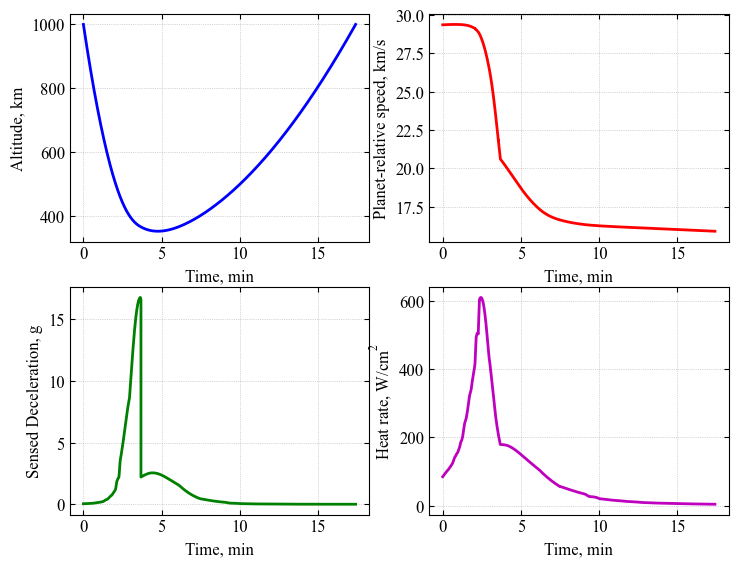

In [10]:
plt.figure(figsize=(8.5, 6.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle.t_min_full, vehicle.h_km_full, 'b-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(vehicle.t_min_full, vehicle.v_kms_full, 'r-', linewidth=2.0)
plt.ylabel('Planet-relative speed, km/s',fontsize=12)
plt.xlabel('Time, min',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)



plt.subplot(2, 2, 3)
plt.plot(vehicle.t_min_full, vehicle.acc_net_g_full, 'g-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Sensed Deceleration, g',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle.t_min_full, vehicle.q_stag_total_full, 'm-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)


plt.show()

In [11]:
vehicle.terminal_apoapsis

12512.108831762858

In [12]:
vehicle.terminal_periapsis

284.90564706108347

In [13]:
vehicle.periapsis_raise_DV

211.52098685821147